1.总控制面板

In [ ]:
# ==============================================================================
#                      【总控制面板】- 项目参数配置文件
#
#                    您只需要在这里修改，即可控制整个分析流程
# ==============================================================================

# 导入 os 库，这是一个处理文件路径的标准库，能让我们的路径设置更智能、更不容易出错。
import os

# ==============================================================================
# 1. 文件与路径定义区
# ------------------------------------------------------------------------------
# 描述: 这个区域定义了所有输入文件的位置。良好的路径管理是项目可复现的第一步。
# ==============================================================================

# --- 1.1 项目根目录设置 ---
# 通常，我们的 'scripts' 和 'data' 文件夹都在一个总的项目文件夹下。
# '../../' 表示从当前脚本的位置（例如 'scripts/notebooks'）返回两级，到达项目根目录。
# 【请根据您的实际文件结构调整】
PROJECT_ROOT_DIR = '../../'

# --- 1.2 数据输入目录 ---
# 使用 os.path.join() 可以自动根据您的操作系统（Windows/Mac/Linux）使用正确的路径分隔符（'\' 或 '/'）。
RAW_DATA_DIR = os.path.join(PROJECT_ROOT_DIR, 'data', 'raw_data')

# --- 1.3 【核心】输入文件字典 ---
# 我们使用一个“字典”来管理所有输入文件，这样做的好处是：
# a. 集中管理，一目了然。
# b. 代码中可以通过键名（如 "protein_matrix"）来调用文件，比直接写死路径更清晰、更安全。
# c. 未来如果新增文件类型（比如修饰组学文件），只需在这里添加一行即可。
INPUT_FILES = {
    # a. DIANN的标准输出矩阵 (用于常规QC和差异分析)
    "protein_matrix": os.path.join(RAW_DATA_DIR, 'report.pg_matrix.tsv'),
    "peptide_matrix": os.path.join(RAW_DATA_DIR, 'report.pr_matrix.tsv'),
    
    # b. DIANN的主报告文件 (通常是 .parquet 或 .tsv，用于更深入的QC)
    "diann_main_report": os.path.join(RAW_DATA_DIR, 'report.parquet'),
    
    # c. (可选) 实验设计/样本信息文件
    # 如果您有一个单独的文件描述了每个样本的元数据（例如批次、处理天数等），可以在这里定义。
    # "sample_metadata": os.path.join(PROJECT_ROOT_DIR, 'metadata', 'sample_info.csv')
}

# --- 1.4 数据输出目录 ---
# 定义一个存放所有分析结果（图表、表格）的文件夹。
OUTPUT_DIR = os.path.join(PROJECT_ROOT_DIR, 'results')
# 我们可以让代码自动创建这个文件夹，如果它还不存在的话
# (这行代码通常放在执行区，但在这里定义路径是合理的)
os.makedirs(OUTPUT_DIR, exist_ok=True)

# --- 1.5 报告设置 ---
# a. 定义当前 Jupyter Notebook 的文件名
#    这是为了让报告生成模块知道应该转换哪一个文件。
#    【重要】请确保这个名字与您保存的 .ipynb 文件名完全一致！
NOTEBOOK_FILE_NAME = 'preprocessing.ipynb' 

# b. 定义最终生成的报告文件名
REPORT_FILE_NAME = 'Final_Analysis_Report.html'

# ==============================================================================
# 2. 样本与分组定义区
# ------------------------------------------------------------------------------
# 描述: 这里是实验设计的核心。您将告诉代码，哪些样本属于哪个组。
# ==============================================================================

# --- 2.1 样本别名映射 (长名称 -> 短名称) ---
# DIANN输出的列名通常是完整的文件路径，又长又不美观。
# 在这里，我们创建一个“通讯录”，将原始的长名称映射为您想要的、简洁易读的短名称。
# 【重要】请确保左边的“键”（长路径）与您数据文件中的列名完全一致！
# 【技巧】在字符串前加上 'r' (例如 r'D:\...') 可以防止路径中的反斜杠被错误解析，这是一个好习惯。
COLUMN_MAPPING = {
    # 示例 (Windows 路径):
          r'D:\20250902_SP_pre_experiment_1_data\JDL_1_RC7_1_32932.d': 'JDL_1',
          r'D:\20250902_SP_pre_experiment_1_data\JDL_2_RC8_1_32933.d': 'JDL_2',
          r'D:\20250902_SP_pre_experiment_1_data\JDL_3_RD1_1_32934.d': 'JDL_3',
          r'D:\20250902_SP_pre_experiment_1_data\JDL_4_RD2_1_32935.d': 'JDL_4',
}
    # r'D:\2025_Lab_Data\Project_X\raw\Control_1.mzML': 'Control_1',
    # r'D:\2025_Lab_Data\Project_X\raw\Model_1.mzML': 'Model_1',
    
    # 示例 (Linux/Mac 路径):
    # '/data/project_x/raw/JDL_1.mzML': 'JDL_1',
    # '/data/project_x/raw/JDL_2.mzML': 'JDL_2',
}

# --- 2.2 实验分组定义 ---
# 在这里，您将使用上面定义的【短名称】来定义您的实验组。
# 这是一个字典，其中“键”是您的组名（如 'JDL', 'Control'），“值”是一个包含该组所有样本短名称的列表。
GROUP_DEFINITIONS = {
    'JDL_test1': ['JDL_1', 'JDL_2','JDL_3', 'JDL_4'],
   # 'JDL_test2': []
    # 'Control': ['Control_1', 'Control_2', 'Control_3'],
    # 'Model': ['Model_1', 'Model_2', 'Model_3'],
}


# ==============================================================================
# 3. 分析流程控制与参数区
# ------------------------------------------------------------------------------
# 描述: 这里是分析流程的“开关”和“旋钮”。您可以决定执行哪些分析，并调整其细节参数。
# ==============================================================================


# --- 3.1 数据处理 ---
# a. 是否执行中位数归一化
#    对于可能存在上样量差异的数据，强烈建议设置为 True。
#    归一化可以校正系统性技术偏差，让样本更具可比性。
PERFORM_NORMALIZATION = True


# --- 3.2 质量控制 (QC) 分析 ---
# a. 污染物关键词列表
# 定义一个列表，包含您希望从数据中移除的常见污染物相关的关键词。
CONTAMINANT_KEYWORDS = ['KRT', 'Keratin', 'Trypsin', 'trypsin']

# --- 3.3 差异表达分析 ---
# a. 定义要进行比较的组
# 这是一个列表，其中每个元素都是一个包含两个组名的元组 `(组1, 组2)`。
# 代码将自动为列表中的每一对组合进行差异分析 (组1 vs 组2)。
# 【重要】如果您的数据只有一个组，或者您暂时不想进行差异分析，请将此列表设置为空 `[]`。
COMPARISON_PAIRS = [
    # ('JDL_test1', ),  # 这将触发 Model 组 vs Control 组的比较
    # ('JDL', 'Control'),   # 您也可以定义多对比较
]

# b. 差异筛选统计阈值
# 只有同时满足以下两个条件的蛋白质才被认为是“显著差异”的。
P_VALUE_THRESHOLD = 0.05  # P值的筛选阈值 (通常设为 0.05 或 0.01)。
LOG2_FC_THRESHOLD = 1.0   # Log2 Fold Change (倍数变化) 的阈值。1.0 代表 2 倍差异，0.58 代表 1.5 倍差异。

# --- 3.4 功能富集分析 (GO/KEGG) ---
# a. 物种设置
# 为GO/KEGG分析指定物种。请使用标准的物种名称或代码。
# 常见物种: 'human', 'mouse', 'rat'。
SPECIES_FOR_ENRICHMENT = 'human'

# b. GO/KEGG 富集分析的P值阈值
# 用于筛选显著富集的功能条目或通路。
ENRICHMENT_P_VALUE_THRESHOLD = 0.05

# ==============================================================================
# 4. 可视化参数区
# ------------------------------------------------------------------------------
# 描述: 统一管理所有图表的视觉风格，确保报告的美观和一致性。
# ==============================================================================

# --- 4.1 调色板定义 ---
# 为您的不同实验组定义专属颜色，让图表（如PCA图、火山图）的颜色保持一致。
# 您可以使用颜色名称（如 'blue'）或十六进制代码（如 '#3498db'）。
GROUP_COLORS = {
    'JDL_test1': 'skyblue',
   # 'JDL_test2': 'orange',
    'Control': '#2ecc71', # 绿色
    'Model': '#e74c3c',   # 红色
}

# --- 4.2 字体大小设置 ---
# 统一控制图表的标题和坐标轴标签的字体大小。
FIGURE_TITLE_FONTSIZE = 16
AXIS_LABEL_FONTSIZE = 12


# ==============================================================================
#                      【配置核对与信息打印】
#          (生成一份详细的配置报告，便于日后回顾和问题排查)
# ==============================================================================

print("\n" + "="*60)
print("✅ 【总控制面板】配置加载成功！正在生成您的项目配置总览...")
print("="*60)

# --- 1. 文件与路径总览 ---
print("\n【1. 文件与路径信息】")
print(f"  - 项目根目录 (PROJECT_ROOT_DIR): {PROJECT_ROOT_DIR}")
print(f"  - 结果输出目录 (OUTPUT_DIR)    : {OUTPUT_DIR}")
print("  - 使用的输入文件 (INPUT_FILES):")
# 循环打印所有输入文件，而不是只打印一个
for key, path in INPUT_FILES.items():
    print(f"    - {key:<20}: {path}") # {:<20} 是为了让输出对齐，更美观

# --- 2. 样本与分组定义 ---
print("\n【2. 样本与分组定义】")
if COLUMN_MAPPING:
    print("  - 样本别名映射 (长名称 -> 短名称):")
    for long_name, short_name in COLUMN_MAPPING.items():
        print(f"    - '{short_name}'  <-  '{long_name}'")
else:
    print("  - 未定义样本别名映射。")

if GROUP_DEFINITIONS:
    print("  - 实验分组定义 (GROUP_DEFINITIONS):")
    for group, samples in GROUP_DEFINITIONS.items():
        print(f"    - 组 '{group}': 包含 {len(samples)} 个样本 -> {samples}")
else:
    print("  - 未定义实验分组。")

# --- 3. 分析流程控制与参数 ---
print("\n【3. 分析流程控制与参数】")
print("  - 污染物筛选关键词:")
print(f"    - {CONTAMINANT_KEYWORDS}")
print("  - 差异分析设置:")
if COMPARISON_PAIRS:
    print(f"    - P值阈值: {P_VALUE_THRESHOLD}")
    print(f"    - Log2FC阈值: {LOG2_FC_THRESHOLD}")
    print("    - 计划的组间比较:")
    for pair in COMPARISON_PAIRS:
        print(f"      - {pair[0]} vs {pair[1]}")
else:
    print("    - 未定义差异分析比较，将跳过相关步骤。")

print("  - 功能富集分析设置:")
print(f"    - 物种: {SPECIES_FOR_ENRICHMENT}")
print(f"    - 富集P值阈值: {ENRICHMENT_P_VALUE_THRESHOLD}")

# --- 4. 可视化参数 ---
print("\n【4. 可视化参数】")
if GROUP_COLORS:
    print("  - 分组颜色定义 (GROUP_COLORS):")
    for group, color in GROUP_COLORS.items():
        print(f"    - 组 '{group}': {color}")
else:
    print("  - 未定义分组颜色。")
print("  - 字体大小设置:")
print(f"    - 图表标题: {FIGURE_TITLE_FONTSIZE} | 坐标轴标签: {AXIS_LABEL_FONTSIZE}")

print("\n" + "="*60)
print("配置总览打印完毕。后续分析将严格按照以上参数执行。")
print("="*60)


✅ 【总控制面板】配置加载成功！正在生成您的项目配置总览...

【1. 文件与路径信息】
  - 项目根目录 (PROJECT_ROOT_DIR): ../../
  - 结果输出目录 (OUTPUT_DIR)    : ../../results
  - 使用的输入文件 (INPUT_FILES):
    - protein_matrix      : ../../data/raw_data/report.pg_matrix.tsv
    - peptide_matrix      : ../../data/raw_data/report.pr_matrix.tsv
    - diann_main_report   : ../../data/raw_data/report.parquet

【2. 样本与分组定义】
  - 样本别名映射 (长名称 -> 短名称):
    - 'JDL_2'  <-  'D:\2025_11_hgx\2025_11_10_Totipotent_Embryonic_Stem_Cell_TESC\JDL_test2_uncalibrated.mzML'
    - 'JDL_1'  <-  'D:\2025_11_hgx\2025_11_10_Totipotent_Embryonic_Stem_Cell_TESC\JDL_test1_uncalibrated.mzML'
  - 实验分组定义 (GROUP_DEFINITIONS):
    - 组 'JDL_test1': 包含 2 个样本 -> ['JDL_1', 'JDL_2']

【3. 分析流程控制与参数】
  - 污染物筛选关键词:
    - ['KRT', 'Keratin', 'Trypsin', 'trypsin']
  - 差异分析设置:
    - 未定义差异分析比较，将跳过相关步骤。
  - 功能富集分析设置:
    - 物种: human
    - 富集P值阈值: 0.05

【4. 可视化参数】
  - 分组颜色定义 (GROUP_COLORS):
    - 组 'JDL_test1': skyblue
    - 组 'Control': #2ecc71
    - 组 'Model': #e74c3c
  - 字体大小设置:
    -

2.数据加载与预处理

--- 准备启动【模块一】 ---
✅ 配置信息打包成功。

🚀 即将执行数据加载、预处理与归一化...

【模块一】函数开始执行：加载、预处理与归一化 (详细过程模式)

--- 步骤 1: 检查并加载所有输入文件 ---
  [✅ 加载成功] 'protein_matrix' (共 157 行)
  [✅ 加载成功] 'peptide_matrix' (共 1035 行)
  [✅ 加载成功] 'diann_main_report' (共 1911 行)


--- 步骤 2: 对已加载的数据进行基础预处理 ---

➡️  **正在预处理: 'protein_matrix'**
  - [完成] 已对 'protein_matrix' 执行设置索引、重命名和去污染操作。

➡️  **正在预处理: 'peptide_matrix'**
  - [完成] 已对 'peptide_matrix' 执行设置索引和重命名操作。


--- 步骤 3: 执行中位数归一化 (由配置 'PERFORM_NORMALIZATION=True' 触发) ---

📊 (1) 归一化前的数据分布 (Log2 强度):


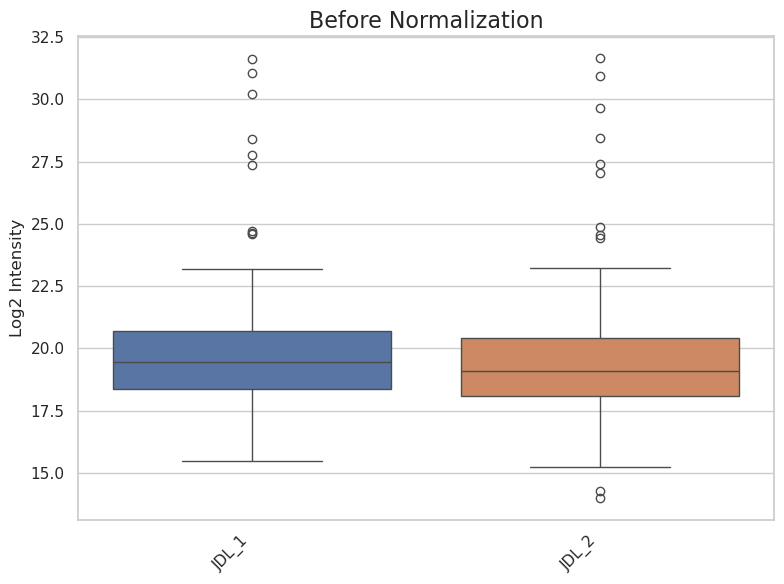


⚙️ (2) 开始执行归一化计算...
  - [执行] 已计算缩放因子并应用于数据。

✨ (3) 归一化后的数据分布 (Log2 强度):


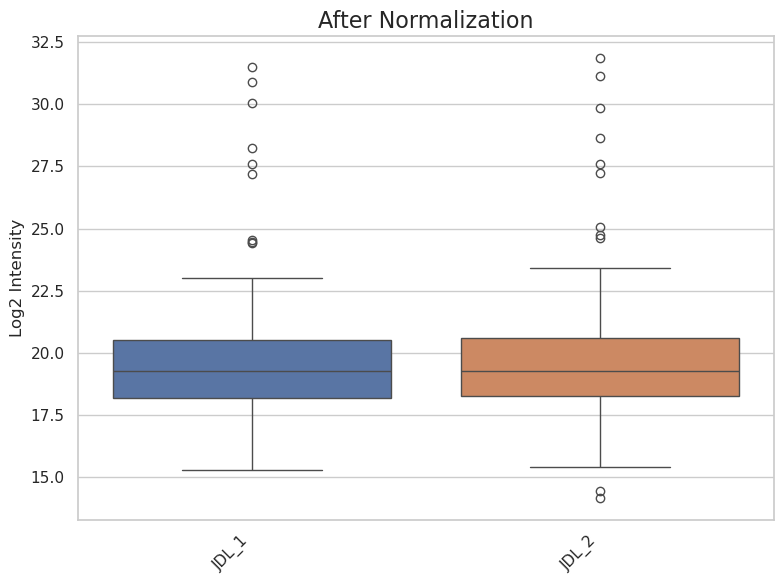

  - [观察] 归一化后，所有样本的箱线图中位线应基本对齐。

  - [完成] 已将归一化后的定量数据更新到 'protein_matrix'。

【模块一】函数执行完毕！


--- 【模块一】总流程执行完毕 ---
✅ 所有数据已准备就绪，并存入 `loaded_data` 变量。


In [5]:
# ==============================================================================
#                      【模块一 - 最终升级版】数据加载、预处理与归一化
#
#    本模块负责加载、预处理，并根据配置可选地执行中位数归一化。
#    运行此单元格后，`loaded_data` 变量将包含准备好用于所有后续分析的数据。
# ==============================================================================

# ------------------------------------------------------------------------------
# (A) 函数定义区: 包含所有功能的完整函数
# ------------------------------------------------------------------------------
import pandas as pd
import numpy as np
import os
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

def load_preprocess_normalize_data_verbose(config):
    """
    一个完整的函数，负责加载、预处理和可选的归一化。
    """
    print("\n" + "="*80)
    print("【模块一】函数开始执行：加载、预处理与归一化 (详细过程模式)")
    print("="*80)
    
    # --- 步骤 1: 智能加载所有存在的文件 ---
    loaded_dataframes = {}
    print("\n--- 步骤 1: 检查并加载所有输入文件 ---")
    for file_key, file_path in config['INPUT_FILES'].items():
        if os.path.exists(file_path):
            try:
                if file_path.endswith('.tsv'): df = pd.read_csv(file_path, sep='\t')
                elif file_path.endswith('.csv'): df = pd.read_csv(file_path)
                elif file_path.endswith('.parquet'): df = pd.read_parquet(file_path)
                else: continue
                loaded_dataframes[file_key] = df
                print(f"  [✅ 加载成功] '{file_key}' (共 {len(df)} 行)")
            except Exception as e:
                print(f"  [❌ 读取错误] '{file_key}'. 错误: {e}")
        else:
            print(f"  [⚠️ 文件缺失] '{file_key}'，已跳过。")
    
    # --- 步骤 2: 对已加载的数据进行预处理 ---
    print("\n\n--- 步骤 2: 对已加载的数据进行基础预处理 ---")
    
    # a. 处理蛋白质矩阵 (protein_matrix)
    if 'protein_matrix' in loaded_dataframes:
        print("\n➡️  **正在预处理: 'protein_matrix'**")
        df = loaded_dataframes['protein_matrix']
        # (为了简洁，这里只打印一次操作日志)
        if 'Protein.Group' in df.columns: df.set_index('Protein.Group', inplace=True)
        if config.get('COLUMN_MAPPING'): df.rename(columns=config['COLUMN_MAPPING'], inplace=True)
        if config.get('CONTAMINANT_KEYWORDS'):
            if 'Genes' in df.columns:
                is_contaminant = df['Genes'].str.contains('|'.join(config['CONTAMINANT_KEYWORDS']), na=False)
                df = df[~is_contaminant]
        loaded_dataframes['protein_matrix'] = df
        print("  - [完成] 已对 'protein_matrix' 执行设置索引、重命名和去污染操作。")

    # b. 处理肽段矩阵 (peptide_matrix)
    if 'peptide_matrix' in loaded_dataframes:
        print("\n➡️  **正在预处理: 'peptide_matrix'**")
        df = loaded_dataframes['peptide_matrix']
        if 'Precursor.Id' in df.columns: df.set_index('Precursor.Id', inplace=True)
        if config.get('COLUMN_MAPPING'): df.rename(columns=config.get('COLUMN_MAPPING'), inplace=True)
        loaded_dataframes['peptide_matrix'] = df
        print("  - [完成] 已对 'peptide_matrix' 执行设置索引和重命名操作。")

    # --- 步骤 3: (可选) 对蛋白质矩阵进行中位数归一化 ---
    if config.get('PERFORM_NORMALIZATION', False) and 'protein_matrix' in loaded_dataframes:
        print("\n\n--- 步骤 3: 执行中位数归一化 (由配置 'PERFORM_NORMALIZATION=True' 触发) ---")
        protein_df = loaded_dataframes['protein_matrix']
        
        # 提取所有定量列
        quant_cols = [col for group in config['GROUP_DEFINITIONS'].values() for col in group if col in protein_df.columns]
        quant_df = protein_df[quant_cols]

        # a. 展示归一化前的数据分布
        print("\n📊 (1) 归一化前的数据分布 (Log2 强度):")
        plt.figure(figsize=(max(8, len(quant_cols) * 0.8), 6))
        sns.boxplot(data=np.log2(quant_df.replace(0, np.nan) + 1))
        plt.title('Before Normalization', fontsize=config.get('FIGURE_TITLE_FONTSIZE', 16))
        plt.ylabel('Log2 Intensity')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # b. 执行中位数归一化
        print("\n⚙️ (2) 开始执行归一化计算...")
        medians = quant_df.replace(0, np.nan).median()
        grand_median = medians.mean()
        scaling_factors = grand_median / medians
        normalized_df = quant_df.multiply(scaling_factors, axis=1)
        print("  - [执行] 已计算缩放因子并应用于数据。")
        
        # c. 展示归一化后的数据分布
        print("\n✨ (3) 归一化后的数据分布 (Log2 强度):")
        plt.figure(figsize=(max(8, len(quant_cols) * 0.8), 6))
        sns.boxplot(data=np.log2(normalized_df.replace(0, np.nan) + 1))
        plt.title('After Normalization', fontsize=config.get('FIGURE_TITLE_FONTSIZE', 16))
        plt.ylabel('Log2 Intensity')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        print("  - [观察] 归一化后，所有样本的箱线图中位线应基本对齐。")

        # d. 将归一化后的数据更新回主 DataFrame
        protein_df[quant_cols] = normalized_df
        loaded_dataframes['protein_matrix'] = protein_df
        print("\n  - [完成] 已将归一化后的定量数据更新到 'protein_matrix'。")
    
    # --- 最终总结 ---
    print("\n" + "="*80)
    print("【模块一】函数执行完毕！")
    print("="*80)
    
    return loaded_dataframes

# ------------------------------------------------------------------------------
# (B) 主逻辑执行区: “点火开关”
# ------------------------------------------------------------------------------
print("--- 准备启动【模块一】 ---")
try:
    # 重新打包配置信息，确保包含了新增的 PERFORM_NORMALIZATION 开关
    config = {
        'PROJECT_ROOT_DIR': PROJECT_ROOT_DIR, 
        'INPUT_FILES': INPUT_FILES,
        'OUTPUT_DIR': OUTPUT_DIR, 
        'COLUMN_MAPPING': COLUMN_MAPPING,
        'GROUP_DEFINITIONS': GROUP_DEFINITIONS, 
        'COMPARISON_PAIRS': COMPARISON_PAIRS,
        'P_VALUE_THRESHOLD': P_VALUE_THRESHOLD, 
        'LOG2_FC_THRESHOLD': LOG2_FC_THRESHOLD,
        'CONTAMINANT_KEYWORDS': CONTAMINANT_KEYWORDS, 
        'SPECIES_FOR_ENRICHMENT': SPECIES_FOR_ENRICHMENT,
        'ENRICHMENT_P_VALUE_THRESHOLD': ENRICHMENT_P_VALUE_THRESHOLD,
        'GROUP_COLORS': GROUP_COLORS, 
        'FIGURE_TITLE_FONTSIZE': FIGURE_TITLE_FONTSIZE,
        'AXIS_LABEL_FONTSIZE': AXIS_LABEL_FONTSIZE,
        'PERFORM_NORMALIZATION': PERFORM_NORMALIZATION # 确保这个新的开关也被包含进来
    }
    print("✅ 配置信息打包成功。")

    print("\n🚀 即将执行数据加载、预处理与归一化...")
    loaded_data = load_preprocess_normalize_data_verbose(config)
    
    print("\n\n--- 【模块一】总流程执行完毕 ---")
    print("✅ 所有数据已准备就绪，并存入 `loaded_data` 变量。")

except NameError as e:
    print(f"\n❌ 错误: 【总控制面板】中的变量未定义。请确保已运行该单元格。错误: {e}")

3.智能质量控制（QC）分析

--- 准备启动【模块二】 ---
✅ `loaded_data` 和 `config` 已找到。

🚀 即将执行智能质量控制 (QC) 分析...

【模块二】函数开始执行：智能质量控制 (QC) 分析


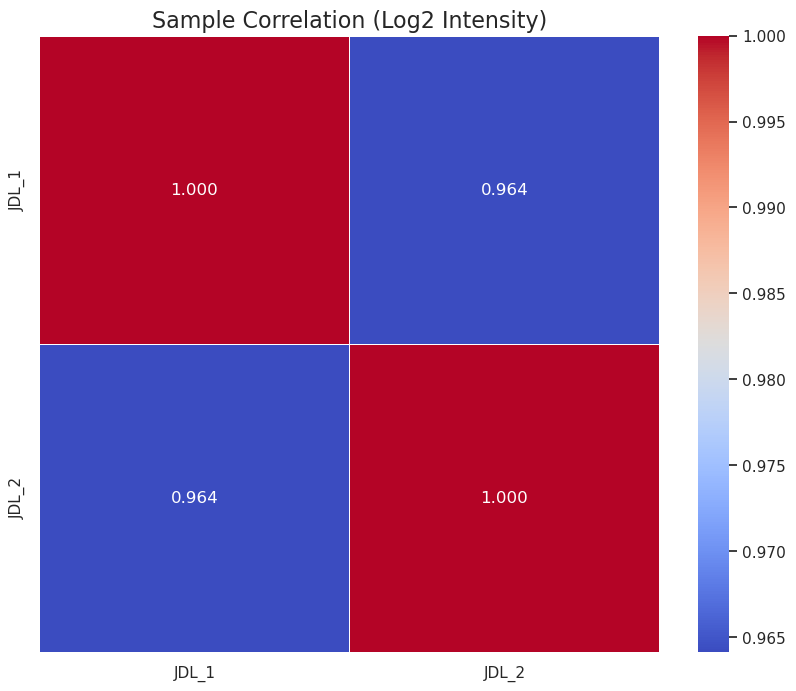

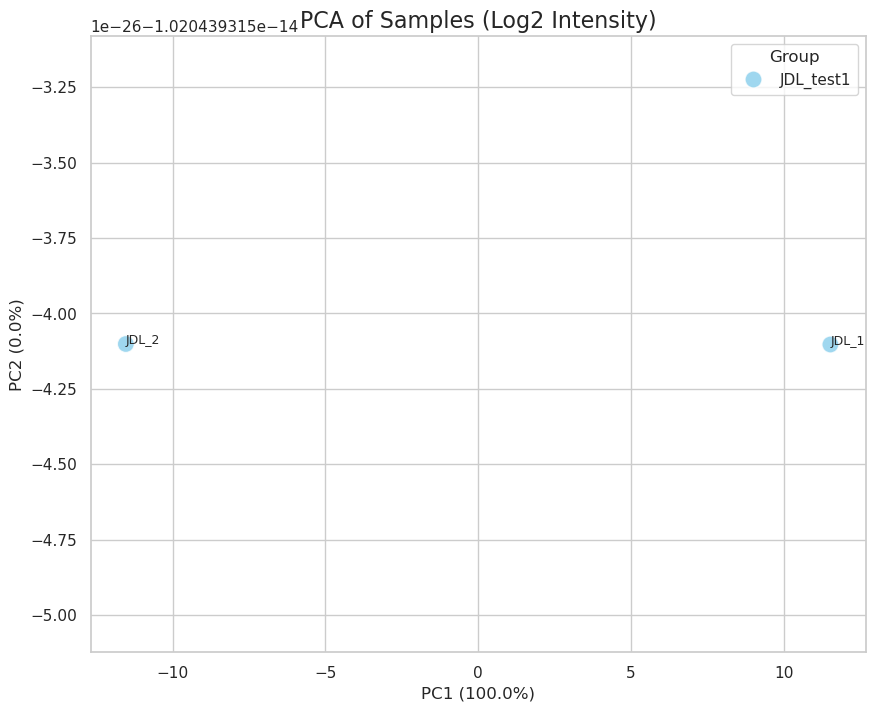

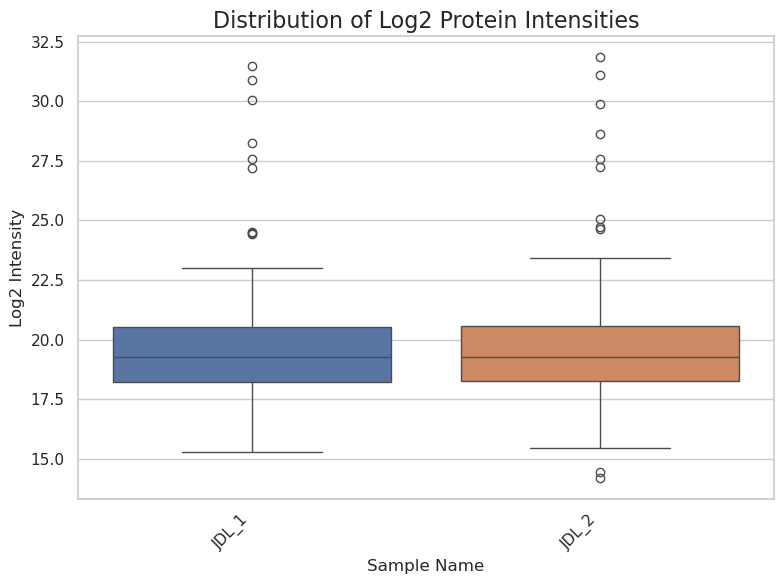

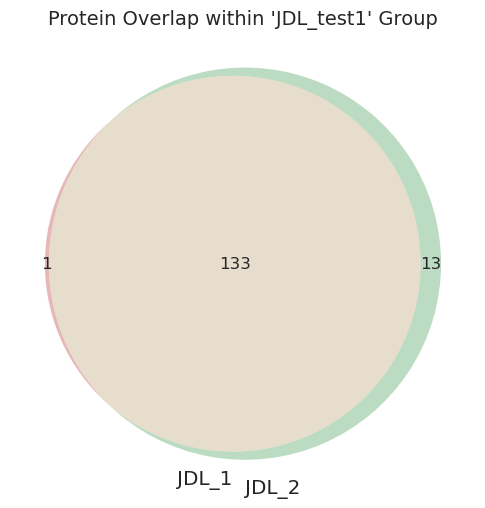

CV是衡量重复性好坏的定量指标，通常CV中位数 < 20% 表示重复性良好。
  - 组 'JDL_test1' 的CV中位数: 20.58%


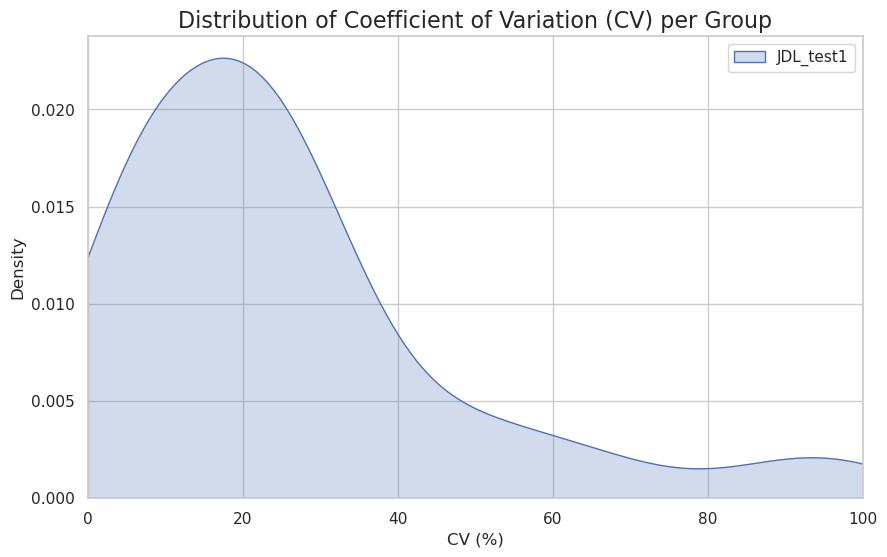


【模块二】函数执行完毕！


--- 【模块二】总流程执行完毕 ---
✅ 所有QC图表已生成。


In [6]:
# ==============================================================================
#                      【模块二 - 升级版】智能QC分析 (带CV分析)
#
#    本模块能够自动识别您的实验设计，执行最合适的QC分析，
#    并新增了【变异系数(CV)分析】，用于定量评估组内重复性。
# ==============================================================================

# ------------------------------------------------------------------------------
# (A) 依赖库与辅助函数定义区
# ------------------------------------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from IPython.display import display, HTML

# 尝试导入韦恩图和Upset图的库
try:
    from matplotlib_venn import venn2, venn3
except ImportError:
    print("正在安装 'matplotlib-venn' 库...")
    !pip install matplotlib-venn
    from matplotlib_venn import venn2, venn3

try:
    from upsetplot import from_contents, UpSet
except ImportError:
    print("正在安装 'upsetplot' 库...")
    !pip install upsetplot
    from upsetplot import from_contents, UpSet

# 设置统一的绘图风格
sns.set_theme(style="whitegrid")

# --- 辅助绘图函数 (我们的“工具箱”) ---

def plot_venn_diagram(dataframe, columns, title):
    """为2或3个重复绘制韦恩图"""
    sets = [set(dataframe[col].dropna().index) for col in columns]
    plt.figure(figsize=(8, 6))
    if len(sets) == 2:
        venn2(sets, set_labels=columns)
    elif len(sets) == 3:
        venn3(sets, set_labels=columns)
    plt.title(title, fontsize=14)
    plt.show()

def plot_upset_plot(dataframe, columns, title):
    """为超过3个重复绘制Upset图"""
    contents = {col: dataframe[col].dropna().index for col in columns}
    upset_data = from_contents(contents)
    plt.figure(figsize=(10, 6))
    UpSet(upset_data, subset_size='count', sort_by='cardinality', show_counts=True).plot()
    plt.suptitle(title, fontsize=14)
    plt.show()

def plot_quantitative_qc(quant_df_log2, config, group_mapping):
    """执行所有定量的QC分析（热图, PCA, 箱线图）"""
    columns_for_qc = quant_df_log2.columns
    
    # 1. 相关性热图
    display(HTML("<h4>样本间相关性热图 (Correlation Heatmap)</h4>"))
    corr_matrix = quant_df_log2.corr(method='pearson')
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=.5)
    plt.title('Sample Correlation (Log2 Intensity)', fontsize=config['FIGURE_TITLE_FONTSIZE'])
    plt.show()

    # 2. 主成分分析 (PCA)
    display(HTML("<h4>主成分分析 (PCA Plot)</h4>"))
    pca_data = quant_df_log2.dropna()
    if pca_data.shape[0] < 2:
        print("  [⚠️ 警告] 数据不足以进行PCA分析，已跳过。")
    else:
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(pca_data.T)
        pca = PCA(n_components=2)
        principal_components = pca.fit_transform(scaled_data)
        pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
        pca_df['Sample'] = columns_for_qc
        pca_df['Group'] = pca_df['Sample'].map(group_mapping)
        plt.figure(figsize=(10, 8))
        sns.scatterplot(x='PC1', y='PC2', hue='Group', data=pca_df, palette=config.get('GROUP_COLORS'), s=150, alpha=0.8)
        for i, sample in enumerate(pca_df['Sample']):
            plt.text(pca_df['PC1'][i], pca_df['PC2'][i], sample, fontsize=9)
        plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontsize=config['AXIS_LABEL_FONTSIZE'])
        plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontsize=config['AXIS_LABEL_FONTSIZE'])
        plt.title('PCA of Samples (Log2 Intensity)', fontsize=config['FIGURE_TITLE_FONTSIZE'])
        plt.grid(True)
        plt.show()

    # 3. 箱线图
    display(HTML("<h4>蛋白丰度分布箱线图 (Box Plot)</h4>"))
    plt.figure(figsize=(max(8, len(columns_for_qc) * 0.8), 6))
    sns.boxplot(data=quant_df_log2)
    plt.title('Distribution of Log2 Protein Intensities', fontsize=config['FIGURE_TITLE_FONTSIZE'])
    plt.ylabel('Log2 Intensity', fontsize=config['AXIS_LABEL_FONTSIZE'])
    plt.xlabel('Sample Name', fontsize=config['AXIS_LABEL_FONTSIZE'])
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# --- 新增的CV分析函数 ---
def plot_cv_distribution(protein_df, group_definitions, config):
    """为每个组计算并可视化蛋白质定量的变异系数(CV)分布"""
    display(HTML("<h3>组内重复的变异系数 (CV) 分布</h3>"))
    print("CV是衡量重复性好坏的定量指标，通常CV中位数 < 20% 表示重复性良好。")
    
    plt.figure(figsize=(10, 6))
    all_cvs = []
    
    for group_name, samples in group_definitions.items():
        if len(samples) < 2: continue
        
        # 使用未进行log转换的数据计算CV
        group_df = protein_df[samples].dropna()
        # 计算 CV = (标准差 / 均值) * 100
        cv = (group_df.std(axis=1) / group_df.mean(axis=1)) * 100
        all_cvs.append(cv.rename(group_name))
        
        median_cv = cv.median()
        print(f"  - 组 '{group_name}' 的CV中位数: {median_cv:.2f}%")
    
    if all_cvs:
        cv_df = pd.concat(all_cvs, axis=1)
        sns.kdeplot(data=cv_df, fill=True, common_norm=False)
        plt.title('Distribution of Coefficient of Variation (CV) per Group', fontsize=config['FIGURE_TITLE_FONTSIZE'])
        plt.xlabel('CV (%)', fontsize=config['AXIS_LABEL_FONTSIZE'])
        plt.xlim(0, 100) # 通常我们只关注0-100%的范围
        plt.grid(True)
        plt.show()

# ------------------------------------------------------------------------------
# (B) 核心逻辑函数: 智能分析流程的“大脑”
# ------------------------------------------------------------------------------
def run_intelligent_qc_analysis(data_dict, config):
    """
    根据实验设计，自动选择并执行最合适的QC分析流程。
    """
    print("\n" + "="*80)
    print("【模块二】函数开始执行：智能质量控制 (QC) 分析")
    print("="*80)

    # --- 1. 数据准备 ---
    if 'protein_matrix' not in data_dict:
        print("  [❌ 错误] 未找到 'protein_matrix'。无法执行QC分析。")
        return
    protein_df = data_dict['protein_matrix']
    group_definitions = config['GROUP_DEFINITIONS']
    num_groups = len(group_definitions)

    # --- 2. 逻辑判断与执行 ---
    # CASE 1: 单组分析
    if num_groups == 1:
        group_name = list(group_definitions.keys())[0]
        samples = group_definitions[group_name]
        num_replicates = len(samples)
        display(HTML(f"<h2>检测到：单组分析模式 (组: '{group_name}')</h2>"))
        if num_replicates < 2:
            print("\n  [⚠️ 警告] 组内只有一个样本，无法进行重复性分析。")
            return
        
        # 2.1 定量重复性分析
        display(HTML("<h3>定量重复性分析</h3>"))
        quant_df_log2 = np.log2(protein_df[samples] + 1)
        group_mapping = {sample: group_name for sample in samples}
        plot_quantitative_qc(quant_df_log2, config, group_mapping)
        
        # 2.2 鉴定重复性分析
        display(HTML("<h3>鉴定重复性分析 (蛋白鉴定重叠情况)</h3>"))
        if num_replicates <= 3:
            plot_venn_diagram(protein_df, samples, f"Protein Overlap within '{group_name}' Group")
        else:
            plot_upset_plot(protein_df, samples, f"Protein Overlap within '{group_name}' Group")
            
        # 2.3 【新增】CV分析
        plot_cv_distribution(protein_df, group_definitions, config)

    # CASE 2: 多组分析
    elif num_groups > 1:
        display(HTML(f"<h2>检测到：多组分析模式 (共 {num_groups} 个组)</h2>"))
        
        # 2.1 核心：组间差异与组内重复性定量分析
        display(HTML("<h3>定量重复性与组间差异分析</h3>"))
        all_samples = [s for samples in group_definitions.values() for s in samples]
        quant_df_log2 = np.log2(protein_df[all_samples] + 1)
        group_mapping = {s: g for g, samples in group_definitions.items() for s in samples}
        plot_quantitative_qc(quant_df_log2, config, group_mapping)

        # 2.2 补充：各组内部的鉴定重复性分析
        display(HTML("<h3>各组内部的鉴定重复性分析</h3>"))
        for group_name, samples in group_definitions.items():
            num_replicates = len(samples)
            display(HTML(f"<h4>分析组: '{group_name}' (共 {num_replicates} 个重复)</h4>"))
            if num_replicates < 2: continue
            if num_replicates <= 3:
                plot_venn_diagram(protein_df, samples, f"Protein Overlap within '{group_name}' Group")
            else:
                plot_upset_plot(protein_df, samples, f"Protein Overlap within '{group_name}' Group")
        
        # 2.3 【新增】CV分析
        plot_cv_distribution(protein_df, group_definitions, config)
    
    else:
        print("  [❌ 错误] 'GROUP_DEFINITIONS' 中未定义任何实验组。")
    
    print("\n" + "="*80)
    print("【模块二】函数执行完毕！")
    print("="*80)

# ------------------------------------------------------------------------------
# (C) 主逻辑执行区: “点火开关”
# ------------------------------------------------------------------------------
print("--- 准备启动【模块二】 ---")
try:
    _ = loaded_data
    _ = config
    print("✅ `loaded_data` 和 `config` 已找到。")
    print("\n🚀 即将执行智能质量控制 (QC) 分析...")
    
    # 【核心】调用智能QC分析函数
    run_intelligent_qc_analysis(loaded_data, config)

    print("\n\n--- 【模块二】总流程执行完毕 ---")
    print("✅ 所有QC图表已生成。")

except NameError as e:
    print(f"\n❌ 错误: 变量 `loaded_data` 或 `config` 未定义。")
    print(f"   请确保您已经成功运行了【模块一】的单元格。")
    print(f"   具体的错误信息是: {e}")

4.差异表达分析

In [7]:
# ==============================================================================
#                      【模块三】差异表达分析
#
#    本模块会根据【总控制面板】中定义的 `COMPARISON_PAIRS`，对指定的
#    组别进行统计学检验，计算 P-value 和 Fold Change。
#
#    如果未定义任何比较，此模块将自动安全跳过。
# ==============================================================================

# ------------------------------------------------------------------------------
# (A) 依赖库与核心函数定义区
# ------------------------------------------------------------------------------
import pandas as pd
import numpy as np
from scipy import stats
from IPython.display import display, HTML

def run_differential_analysis(data_dict, config):
    """
    根据配置中的 `COMPARISON_PAIRS` 执行差异表达分析。
    """
    print("\n" + "="*80)
    print("【模块三】函数开始执行：差异表达分析")
    print("="*80)

    # --- 1. 检查先决条件 ---
    if 'protein_matrix' not in data_dict:
        print("  [❌ 错误] 未找到 'protein_matrix'。无法执行差异分析。")
        return None

    if not config.get('COMPARISON_PAIRS'):
        print("  [ℹ️ 信息] 在配置中未定义 'COMPARISON_PAIRS'。")
        print("  将跳过差异表达分析模块。")
        print("="*80)
        return {} # 返回一个空字典，表示没有进行任何分析

    protein_df = data_dict['protein_matrix']
    group_definitions = config['GROUP_DEFINITIONS']
    
    # --- 2. 遍历所有定义的比较组对 ---
    # 创建一个空字典，用于存储每一对比较的结果
    all_results = {}
    
    print(f"\n检测到 {len(config['COMPARISON_PAIRS'])} 对组间比较任务，开始逐一处理...")
    
    for pair in config['COMPARISON_PAIRS']:
        group2_name, group1_name = pair # 例如: ('Model', 'Control') -> Model vs Control
        
        display(HTML(f"<h3>正在进行比较: {group2_name} vs {group1_name}</h3>"))
        
        # a. 获取两组的样本列名
        group1_samples = group_definitions.get(group1_name, [])
        group2_samples = group_definitions.get(group2_name, [])

        if not group1_samples or not group2_samples:
            print(f"  [⚠️ 警告] 组 '{group1_name}' 或 '{group2_name}' 的样本未定义，跳过此对比较。")
            continue

        # b. 筛选数据：只保留在每组至少一半样本中被鉴定到的蛋白质，以增加统计可靠性
        min_samples_g1 = len(group1_samples) / 2
        min_samples_g2 = len(group2_samples) / 2
        
        analysis_df = protein_df.dropna(subset=group1_samples, thresh=min_samples_g1)
        analysis_df = analysis_df.dropna(subset=group2_samples, thresh=min_samples_g2)
        print(f"  - 经过筛选，共 {len(analysis_df)} 个蛋白质将用于本次差异分析。")

        # c. 逐个蛋白质进行T检验并计算Fold Change
        p_values = []
        log2_fold_changes = []

        for protein in analysis_df.index:
            g1_values = analysis_df.loc[protein, group1_samples].dropna().astype(float)
            g2_values = analysis_df.loc[protein, group2_samples].dropna().astype(float)
            
            # 执行独立样本T检验 (Welch's t-test, 不假设方差相等，更稳健)
            t_stat, p_val = stats.ttest_ind(g2_values, g1_values, equal_var=False, nan_policy='omit')
            p_values.append(p_val)
            
            # 计算 Log2 Fold Change (group2 / group1)
            mean_g1 = np.mean(g1_values + 1)
            mean_g2 = np.mean(g2_values + 1)
            fold_change = mean_g2 / mean_g1
            log2_fold_changes.append(np.log2(fold_change))

        # d. 将结果整理成 DataFrame
        results_df = pd.DataFrame(index=analysis_df.index)
        results_df['p_value'] = p_values
        results_df['log2_fold_change'] = log2_fold_changes
        # 根据阈值添加显著性标签
        results_df['-log10_p_value'] = -np.log10(results_df['p_value'].replace(0, 1e-300)) # 避免log10(0)
        
        results_df['significance'] = 'Not significant'
        up_condition = (results_df['p_value'] < config['P_VALUE_THRESHOLD']) & (results_df['log2_fold_change'] > config['LOG2_FC_THRESHOLD'])
        down_condition = (results_df['p_value'] < config['P_VALUE_THRESHOLD']) & (results_df['log2_fold_change'] < -config['LOG2_FC_THRESHOLD'])
        results_df.loc[up_condition, 'significance'] = 'Up-regulated'
        results_df.loc[down_condition, 'significance'] = 'Down-regulated'

        print("  - 统计计算完成。结果预览 (按p-value排序的前5个):")
        display(results_df.sort_values('p_value').head())
        
        # e. 将这对比较的结果存入总结果字典
        comparison_name = f"{group2_name}_vs_{group1_name}"
        all_results[comparison_name] = results_df
        print(f"  - ✅ 已将结果存入: '{comparison_name}'")

    print("\n" + "="*80)
    print("【模块三】函数执行完毕！")
    print("="*80)
    return all_results

# ------------------------------------------------------------------------------
# (B) 主逻辑执行区: “点火开关”
# ------------------------------------------------------------------------------
print("--- 准备启动【模块三】 ---")
try:
    _ = loaded_data
    _ = config
    
    print("✅ `loaded_data` 和 `config` 已找到。")
    print("\n🚀 即将执行差异表达分析...")
    
    # 【核心】调用差异分析函数，并将返回的字典存入新变量
    differential_results = run_differential_analysis(loaded_data, config)

    print("\n\n--- 【模块三】总流程执行完毕 ---")
    if differential_results:
        print("✅ 差异分析已完成。")
        print(f"✅ 您现在可以在后续单元格中使用 `differential_results` 变量了。")
        print(f"   - 它是一个字典，包含了以下比较的结果: {list(differential_results.keys())}")
    else:
        print("ℹ️ 未执行任何差异分析（可能因为未在配置中定义比较组对）。")

except NameError as e:
    print(f"\n❌ 错误: 变量 `loaded_data` 或 `config` 未定义。")
    print(f"   请确保您已经成功运行了【模块一】和【模块二】的单元格。")
    print(f"   具体的错误信息是: {e}")

--- 准备启动【模块三】 ---
✅ `loaded_data` 和 `config` 已找到。

🚀 即将执行差异表达分析...

【模块三】函数开始执行：差异表达分析
  [ℹ️ 信息] 在配置中未定义 'COMPARISON_PAIRS'。
  将跳过差异表达分析模块。


--- 【模块三】总流程执行完毕 ---
ℹ️ 未执行任何差异分析（可能因为未在配置中定义比较组对）。


5.差异结果可视化

In [8]:
# ==============================================================================
#                      【模块四】差异结果可视化
#
#    本模块负责将【模块三】计算出的差异分析结果进行可视化。
#    它会自动为每一对比较生成火山图 (Volcano Plot) 和聚类热图 (Heatmap)。
#
#    如果【模块三】未产生任何结果，此模块将自动安全跳过。
# ==============================================================================

# ------------------------------------------------------------------------------
# (A) 依赖库与核心函数定义区
# ------------------------------------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# 设置统一的绘图风格
sns.set_theme(style="white")

def plot_volcano(results_df, comparison_name, config):
    """为单次差异分析结果绘制火山图"""
    display(HTML(f"<h4>火山图 (Volcano Plot): {comparison_name}</h4>"))
    
    plt.figure(figsize=(10, 8))
    
    # 使用配置中定义的颜色
    palette = {
        'Up-regulated': config['GROUP_COLORS'].get(comparison_name.split('_vs_')[0], 'red'),
        'Down-regulated': config['GROUP_COLORS'].get(comparison_name.split('_vs_')[1], 'blue'),
        'Not significant': 'grey'
    }
    
    ax = sns.scatterplot(
        data=results_df,
        x='log2_fold_change',
        y='-log10_p_value',
        hue='significance',
        palette=palette,
        alpha=0.7,
        s=50
    )
    
    # 添加阈值线
    plt.axvline(x=config['LOG2_FC_THRESHOLD'], color='black', linestyle='--', linewidth=1)
    plt.axvline(x=-config['LOG2_FC_THRESHOLD'], color='black', linestyle='--', linewidth=1)
    plt.axhline(y=-np.log10(config['P_VALUE_THRESHOLD']), color='black', linestyle='--', linewidth=1)
    
    plt.title(f'Volcano Plot: {comparison_name}', fontsize=config['FIGURE_TITLE_FONTSIZE'])
    plt.xlabel('Log2 Fold Change', fontsize=config['AXIS_LABEL_FONTSIZE'])
    plt.ylabel('-log10(P-value)', fontsize=config['AXIS_LABEL_FONTSIZE'])
    
    # 添加注释显示差异蛋白数量
    counts = results_df['significance'].value_counts()
    up_count = counts.get('Up-regulated', 0)
    down_count = counts.get('Down-regulated', 0)
    plt.text(plt.xlim()[1]*0.95, plt.ylim()[1]*0.9, f'Up: {up_count}', color=palette['Up-regulated'], ha='right')
    plt.text(plt.xlim()[0]*0.95, plt.ylim()[1]*0.9, f'Down: {down_count}', color=palette['Down-regulated'], ha='left')

    plt.show()

def plot_heatmap(protein_df, results_df, comparison_name, config):
    """为显著差异的蛋白质绘制聚类热图"""
    display(HTML(f"<h4>差异蛋白聚类热图 (Clustered Heatmap): {comparison_name}</h4>"))
    
    # a. 筛选出显著差异的蛋白质
    significant_proteins = results_df[results_df['significance'] != 'Not significant'].index
    
    if len(significant_proteins) == 0:
        print("  [ℹ️ 信息] 未发现显著差异的蛋白质，无法生成热图。")
        return
    if len(significant_proteins) > 100:
        print(f"  [ℹ️ 信息] 差异蛋白数量 ({len(significant_proteins)}) 过多，将只展示前100个进行可视化。")
        top_proteins = results_df.reindex(significant_proteins).sort_values('p_value').head(100).index
    else:
        top_proteins = significant_proteins

    # b. 准备热图所需的数据
    group2_name, group1_name = comparison_name.split('_vs_')
    group1_samples = config['GROUP_DEFINITIONS'][group1_name]
    group2_samples = config['GROUP_DEFINITIONS'][group2_name]
    
    heatmap_data = protein_df.loc[top_proteins, group1_samples + group2_samples]
    heatmap_data_log2 = np.log2(heatmap_data.fillna(0) + 1) # 对缺失值用0填充后log转换

    # c. 创建分组颜色条
    group_colors_map = config['GROUP_COLORS']
    col_colors_series = pd.Series(
        [group_colors_map.get(group1_name, 'grey')] * len(group1_samples) + [group_colors_map.get(group2_name, 'grey')] * len(group2_samples),
        index=group1_samples + group2_samples,
        name='Group'
    )

    # d. 绘图 (clustermap会自动进行聚类)
    sns.clustermap(
        heatmap_data_log2,
        z_score=0,          # 按行进行Z-score标准化，更好地展示表达模式
        cmap='vlag',        # 红-白-蓝色系，适合展示上/下调
        col_colors=col_colors_series,
        col_cluster=False,  # 通常我们不希望对样本列进行聚类，保持分组顺序
        figsize=(10, 12),
        yticklabels= len(top_proteins) <= 50 # 蛋白少于50个时显示蛋白名
    )
    plt.suptitle(f'Heatmap of Differentially Expressed Proteins: {comparison_name}', fontsize=config['FIGURE_TITLE_FONTSIZE'], y=1.02)
    plt.show()

def run_visualization_analysis(data_dict, diff_results, config):
    """
    遍历所有差异分析结果并生成可视化图表。
    """
    print("\n" + "="*80)
    print("【模块四】函数开始执行：差异结果可视化")
    print("="*80)

    if not diff_results:
        print("  [ℹ️ 信息] 'differential_results' 为空，没有可可视化的内容。")
        print("  将跳过此模块。")
        print("="*80)
        return

    protein_df = data_dict['protein_matrix']
    
    for comparison_name, results_df in diff_results.items():
        display(HTML(f"<h2>可视化分析: {comparison_name}</h2>"))
        
        # 1. 绘制火山图
        plot_volcano(results_df, comparison_name, config)
        
        # 2. 绘制热图
        plot_heatmap(protein_df, results_df, comparison_name, config)
        
    print("\n" + "="*80)
    print("【模块四】函数执行完毕！")
    print("="*80)

# ------------------------------------------------------------------------------
# (B) 主逻辑执行区: “点火开关”
# ------------------------------------------------------------------------------
print("--- 准备启动【模块四】 ---")
try:
    _ = loaded_data
    _ = config
    _ = differential_results
    
    print("✅ `loaded_data`, `config`, 和 `differential_results` 已找到。")
    print("\n🚀 即将执行差异结果可视化...")
    
    # 【核心】调用可视化分析函数
    run_visualization_analysis(loaded_data, differential_results, config)

    print("\n\n--- 【模块四】总流程执行完毕 ---")
    print("✅ 所有差异结果的可视化图表已生成。")

except NameError as e:
    print(f"\n❌ 错误: 关键变量未定义。")
    print(f"   请确保您已经成功运行了【模块一】到【模块三】的所有单元格。")
    print(f"   具体的错误信息是: {e}")

--- 准备启动【模块四】 ---
✅ `loaded_data`, `config`, 和 `differential_results` 已找到。

🚀 即将执行差异结果可视化...

【模块四】函数开始执行：差异结果可视化
  [ℹ️ 信息] 'differential_results' 为空，没有可可视化的内容。
  将跳过此模块。


--- 【模块四】总流程执行完毕 ---
✅ 所有差异结果的可视化图表已生成。


6.功能富集分析

--- 准备启动【模块五】 ---
✅ `loaded_data`, `config`, 和 `differential_results` 已找到。

🚀 即将执行智能功能分析...


  - 共发现 145 个基因，开始提交进行功能轮廓分析...


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021,neutrophil mediated immunity (GO:0002446),30/488,1.345776e-19,2.532751e-16,0,0,11.048225,480.069073,KMT2E;GPI;SERPINA1;HSP90AB1;GSTP1;HBB;IQGAP1;C...
1,GO_Biological_Process_2021,neutrophil degranulation (GO:0043312),29/481,9.987215e-19,7.842023e-16,0,0,10.731748,444.807454,GPI;SERPINA1;HSP90AB1;GSTP1;HBB;IQGAP1;C3;CST3...
2,GO_Biological_Process_2021,neutrophil activation involved in immune respo...,29/485,1.250057e-18,7.842023e-16,0,0,10.635417,438.427425,GPI;SERPINA1;HSP90AB1;GSTP1;HBB;IQGAP1;C3;CST3...
3,GO_Biological_Process_2021,platelet degranulation (GO:0002576),16/125,7.953588e-16,3.742163e-13,0,0,22.468957,781.194807,FGB;FGA;ITIH4;SPARC;SERPINA1;AHSG;FGG;FN1;APOA...
4,GO_Biological_Process_2021,cellular protein metabolic process (GO:0044267),24/417,3.742791e-15,1.408786e-12,0,0,9.822472,326.292148,FGA;RPL3;SERPINA1;AHSG;SERPINC1;IGFBP2;FGG;FN1...
...,...,...,...,...,...,...,...,...,...,...
2473,KEGG_2021_Human,RNA transport,1/186,7.432699e-01,7.603565e-01,0,0,0.738363,0.219070,EEF1A1
2474,KEGG_2021_Human,Epstein-Barr virus infection,1/202,7.717453e-01,7.849752e-01,0,0,0.679035,0.175939,B2M
2475,KEGG_2021_Human,Human cytomegalovirus infection,1/225,8.072686e-01,8.164421e-01,0,0,0.608600,0.130301,B2M
2476,KEGG_2021_Human,Ras signaling pathway,1/232,8.169473e-01,8.215629e-01,0,0,0.589947,0.119276,INS


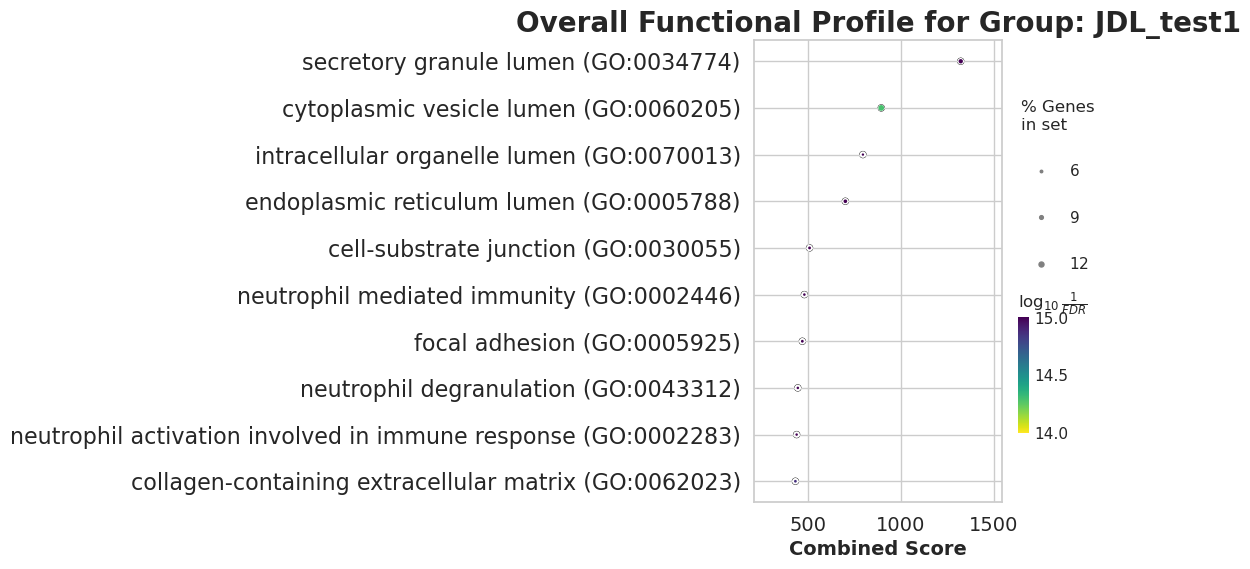




--- 【模块五】总流程执行完毕 ---
✅ 所有功能分析已完成。


In [9]:
# ==============================================================================
#                      【模块五 - 升级版】智能功能分析
#
#    本模块能够自动识别您的实验设计：
#    - 如果有多个组，它会执行【差异富集分析】。
#    - 如果只有一个组，它会执行【整体功能轮廓分析】。
# ==============================================================================

# ------------------------------------------------------------------------------
# (A) 依赖库与核心函数定义区
# ------------------------------------------------------------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

try:
    import gseapy as gp
except ImportError:
    print("正在安装 'gseapy' 库...")
    !pip install gseapy
    import gseapy as gp

sns.set_theme(style="whitegrid")

# --- 函数1: 差异富集分析 (多组比较时使用) ---
def run_differential_enrichment(protein_df, diff_results, config):
    display(HTML("<h2>检测到多组设计，执行【差异富集分析】</h2>"))
    for comparison_name, results_df in diff_results.items():
        display(HTML(f"<h3>富集分析: {comparison_name}</h3>"))
        up_proteins = results_df[results_df['significance'] == 'Up-regulated'].index
        down_proteins = results_df[results_df['significance'] == 'Down-regulated'].index
        up_genes = protein_df.loc[up_proteins, 'Genes'].dropna().str.split(';').explode().unique().tolist()
        down_genes = protein_df.loc[down_proteins, 'Genes'].dropna().str.split(';').explode().unique().tolist()
        gene_sets = ['GO_Biological_Process_2021', 'GO_Cellular_Component_2021', 'GO_Molecular_Function_2021', 'KEGG_2021_Human']

        display(HTML("<h4>上调蛋白 (Up-regulated) 的功能富集</h4>"))
        if len(up_genes) > 5:
            try:
                enr_up = gp.enrichr(gene_list=up_genes, gene_sets=gene_sets, organism=config['SPECIES_FOR_ENRICHMENT'].capitalize(), cutoff=config['ENRICHMENT_P_VALUE_THRESHOLD'])
                display(enr_up.results)
                gp.dotplot(enr_up.results, title=f'Enrichment for Up-regulated Proteins\n({comparison_name})', cmap='viridis_r', top_term=10, show_ring=True)
                plt.show()
            except Exception as e: print(f"  [❌ 错误] 分析出错: {e}")
        else: print("  - 上调基因数量过少，跳过分析。")

        display(HTML("<h4>下调蛋白 (Down-regulated) 的功能富集</h4>"))
        if len(down_genes) > 5:
            try:
                enr_down = gp.enrichr(gene_list=down_genes, gene_sets=gene_sets, organism=config['SPECIES_FOR_ENRICHMENT'].capitalize(), cutoff=config['ENRICHMENT_P_VALUE_THRESHOLD'])
                display(enr_down.results)
                gp.dotplot(enr_down.results, title=f'Enrichment for Down-regulated Proteins\n({comparison_name})', cmap='viridis_r', top_term=10, show_ring=True)
                plt.show()
            except Exception as e: print(f"  [❌ 错误] 分析出错: {e}")
        else: print("  - 下调基因数量过少，跳过分析。")

# --- 函数2: 整体功能轮廓分析 (单组时使用) ---
def run_overall_functional_profiling(protein_df, config):
    group_name = list(config['GROUP_DEFINITIONS'].keys())[0]
    display(HTML(f"<h2>检测到单组设计，执行【整体功能轮廓分析】(组: '{group_name}')</h2>"))
    
    # a. 提取该组中鉴定到的所有蛋白质对应的基因列表
    all_identified_genes = protein_df['Genes'].dropna().str.split(';').explode().unique().tolist()
    
    if len(all_identified_genes) > 5:
        print(f"  - 共发现 {len(all_identified_genes)} 个基因，开始提交进行功能轮廓分析...")
        gene_sets = ['GO_Biological_Process_2021', 'GO_Cellular_Component_2021', 'GO_Molecular_Function_2021', 'KEGG_2021_Human']
        try:
            enr_all = gp.enrichr(gene_list=all_identified_genes,
                                 gene_sets=gene_sets,
                                 organism=config['SPECIES_FOR_ENRICHMENT'].capitalize(),
                                 cutoff=config['ENRICHMENT_P_VALUE_THRESHOLD'])
            
            display(HTML("<h3>鉴定到的所有蛋白质的功能/通路富集结果</h3>"))
            display(enr_all.results)
            gp.dotplot(enr_all.results, title=f'Overall Functional Profile for Group: {group_name}', cmap='viridis_r', top_term=10, show_ring=True)
            plt.show()

        except Exception as e:
            print(f"  [❌ 错误] 在进行整体功能轮廓分析时出错: {e}")
    else:
        print("  - 鉴定到的总基因数过少，跳过分析。")

# ------------------------------------------------------------------------------
# (B) 主逻辑执行区: “智能调度中心”
# ------------------------------------------------------------------------------
print("--- 准备启动【模块五】 ---")
try:
    _ = loaded_data
    _ = config
    _ = differential_results
    
    print("✅ `loaded_data`, `config`, 和 `differential_results` 已找到。")
    print("\n🚀 即将执行智能功能分析...")
    print("="*80)

    # 【核心逻辑判断】
    # 检查【模块一】是否成功加载了蛋白质数据
    if 'protein_matrix' in loaded_data and 'Genes' in loaded_data['protein_matrix'].columns:
        protein_df_for_enrichment = loaded_data['protein_matrix']
        
        # 判断是多组还是单组
        if len(config['GROUP_DEFINITIONS']) > 1:
            # 多组 -> 调用差异富集分析
            if differential_results:
                run_differential_enrichment(protein_df_for_enrichment, differential_results, config)
            else:
                print("  [ℹ️ 信息] 检测到多组设计，但 'differential_results' 为空。没有可用于富集分析的差异蛋白。")
        
        elif len(config['GROUP_DEFINITIONS']) == 1:
            # 单组 -> 调用整体功能轮廓分析
            run_overall_functional_profiling(protein_df_for_enrichment, config)
        
        else: # 零个组
            print("  [ℹ️ 信息] 未在配置中定义任何实验组，跳过功能分析。")

    else:
        print("  [❌ 错误] 'protein_matrix' 或其 'Genes' 列未找到，无法执行功能分析。")

    print("\n" + "="*80)
    print("\n\n--- 【模块五】总流程执行完毕 ---")
    print("✅ 所有功能分析已完成。")

except NameError as e:
    print(f"\n❌ 错误: 关键变量未定义。")
    print(f"   请确保您已经成功运行了【模块一】到【模块四】的所有单元格。")
    print(f"   具体的错误信息是: {e}")

7.生成分析报告

In [11]:
# ==============================================================================
#                      【模块六】一键生成分析报告 (修正版)
# ==============================================================================

# (A) 依赖库与核心函数定义区 (这部分保持不变)
import os
import sys
try:
    import nbformat
    from nbconvert.preprocessors import ExecutePreprocessor
    from nbconvert import HTMLExporter
except ImportError:
    print("正在安装 'notebook' 和 'nbconvert' 库...")
    !{sys.executable} -m pip install notebook nbconvert
    import nbformat
    from nbconvert.preprocessors import ExecutePreprocessor
    from nbconvert import HTMLExporter

def generate_html_report(config):
    print("\n" + "="*80)
    print("【模块六】函数开始执行：生成分析报告")
    print("="*80)
    
    # --- 1. 准备路径和文件名 ---
    # 【修正】直接从 config 字典中安全地获取文件名
    notebook_filename = config['NOTEBOOK_FILE_NAME']
    report_filename = config['REPORT_FILE_NAME']
    
    # 假设您的 notebook 在 scripts/preprocessing 文件夹下，如果不是请修改 'scripts', 'preprocessing'
    notebook_path = os.path.join(config['PROJECT_ROOT_DIR'], 'scripts', 'preprocessing', notebook_filename)
    report_path = os.path.join(config['OUTPUT_DIR'], report_filename)
    
    print(f"  - 待转换的Notebook文件: {notebook_path}")
    print(f"  - 目标报告输出路径: {report_path}")

    if not os.path.exists(notebook_path):
        print(f"\n  [❌ 错误] 找不到指定的Notebook文件: '{notebook_filename}'")
        return

    # --- 2. 构建并执行 nbconvert 命令 ---
    command = (
        f'jupyter nbconvert "{notebook_path}" '
        f'--to html --no-input '
        f'--output "{report_filename}" '
        f'--output-dir "{config["OUTPUT_DIR"]}"'
    )
    
    print("\n  - 正在执行转换命令...")
    exit_code = os.system(command)
    if exit_code == 0:
        print(f"\n  [✅ 成功!] 报告已保存至: {report_path}")
    else:
        print(f"\n  [❌ 错误] 报告生成过程中发生错误。")
        
    print("\n" + "="*80)
    print("【模块六】函数执行完毕！")
    print("="*80)

# ------------------------------------------------------------------------------
# (B) 主逻辑执行区: “点火开关”
# ------------------------------------------------------------------------------
print("--- 准备启动【模块六】 ---")
try:
    # 【核心修正】在执行前，更新 config 字典，确保报告相关的键存在
    config['NOTEBOOK_FILE_NAME'] = NOTEBOOK_FILE_NAME
    config['REPORT_FILE_NAME'] = REPORT_FILE_NAME
    print("✅ `config` 字典已更新，报告配置已载入。")

    print("\n⚠️ 请注意：为确保报告包含最新内容，请在运行此模块前手动保存一下您的Notebook (Ctrl+S)。")
    
    user_input = input("--> 是否确认继续生成报告? (y/n): ")
    if user_input.lower() == 'y':
        print("\n🚀 即将执行报告生成...")
        generate_html_report(config)
        print("\n\n--- 【模块六】总流程执行完毕 ---")
    else:
        print("\n-- 操作已取消 --")

except NameError as e:
    print(f"\n❌ 错误: 关键变量未定义。")
    print(f"   请确保您已经成功运行了【总控制面板】和【模块一】。")
    print(f"   具体的错误信息是: {e}")

--- 准备启动【模块六】 ---
✅ `config` 字典已更新，报告配置已载入。

⚠️ 请注意：为确保报告包含最新内容，请在运行此模块前手动保存一下您的Notebook (Ctrl+S)。

🚀 即将执行报告生成...

【模块六】函数开始执行：生成分析报告
  - 待转换的Notebook文件: ../../scripts/preprocessing/preprocessing.ipynb
  - 目标报告输出路径: ../../results/Final_Analysis_Report.html

  - 正在执行转换命令...


[NbConvertApp] Converting notebook ../../scripts/preprocessing/preprocessing.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Writing 728584 bytes to ../../results/Final_Analysis_Report.html



  [✅ 成功!] 报告已保存至: ../../results/Final_Analysis_Report.html

【模块六】函数执行完毕！


--- 【模块六】总流程执行完毕 ---
